In [3]:
import pandas as pd
df = pd.read_csv('Survived.csv')
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
df2 = df.drop(columns=['PassengerId','Ticket','Cabin','Embarked'])
df2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


In [30]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [31]:
df3 = df2.fillna(df2.sum(numeric_only=True))
df3.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [54]:
dummied = pd.get_dummies(df3['Sex'],drop_first=True,dtype=int)
df4 = pd.concat([df3,dummied],axis=1)
df4 = df4.drop(['Sex'],axis=1)
df4

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.00,1,0,7.2500,1
1,1,1,38.00,1,0,71.2833,0
2,1,3,26.00,0,0,7.9250,0
3,1,1,35.00,1,0,53.1000,0
4,0,3,35.00,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.00,0,0,13.0000,1
887,1,1,19.00,0,0,30.0000,0
888,0,3,21205.17,1,2,23.4500,0
889,1,1,26.00,0,0,30.0000,1


<Axes: >

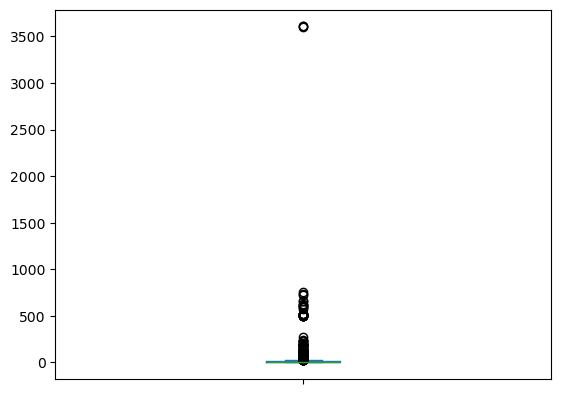

In [40]:
from sklearn.covariance import MinCovDet
mcd = MinCovDet(random_state=0, support_fraction=0.7)
mcd.fit(df4)

distance = mcd.mahalanobis(df4)
distance = pd.Series(distance)
distance.plot(kind='box')

In [43]:
tmp = distance.describe()
tmp

count     891.000000
mean       46.220912
std       229.120177
min         1.436891
25%         3.821914
50%         7.758645
75%        13.239272
max      3607.017833
dtype: float64

In [55]:
iqr = tmp['75%']-tmp['25%']
up = tmp['75%']+iqr*1.5
down = tmp['25%']-iqr*1.5
outliner = distance[(distance>up) | (distance<down)]
df5 = df4.drop(index=outliner.index)
df5.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = pd.DataFrame(sc.fit_transform(df5), columns=df5.columns)
sc_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,-0.738680,0.764637,-0.514716,1.732234,-0.370857,-0.697108,0.679594
1,1.353767,-1.836558,-0.512857,1.732234,-0.370857,3.500748,-1.471468
2,1.353767,0.764637,-0.514252,-0.560614,-0.370857,-0.652857,-1.471468


In [72]:
from sklearn.cluster import KMeans
cl = KMeans(n_clusters=2, random_state=0)
cl.fit(sc_df)
sc_df['cluster'] = cl.labels_
sc_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,cluster
0,-0.738680,0.764637,-0.514716,1.732234,-0.370857,-0.697108,0.679594,0
1,1.353767,-1.836558,-0.512857,1.732234,-0.370857,3.500748,-1.471468,1
2,1.353767,0.764637,-0.514252,-0.560614,-0.370857,-0.652857,-1.471468,0


In [74]:
think = sc_df.groupby('cluster').mean()
think

,Survived,Pclass,Age,SibSp,Parch,Fare,male
cluster,,,,,,,
0,-0.416765,0.348656,0.128774,-0.296055,-0.302881,-0.444536,0.335598
1,0.879837,-0.736052,-0.271856,0.625004,0.639416,0.938464,-0.708484


<Axes: xlabel='cluster'>

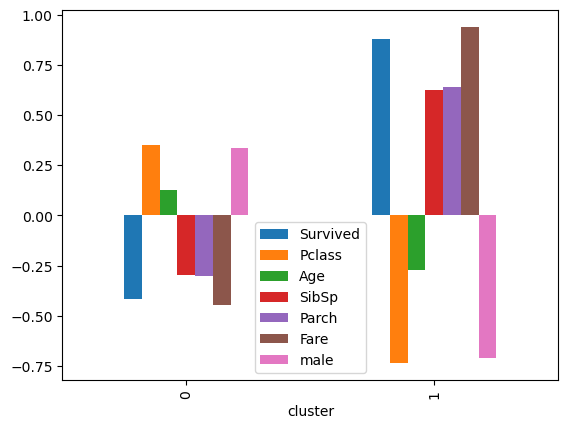

In [75]:
think.plot(kind='bar')